In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


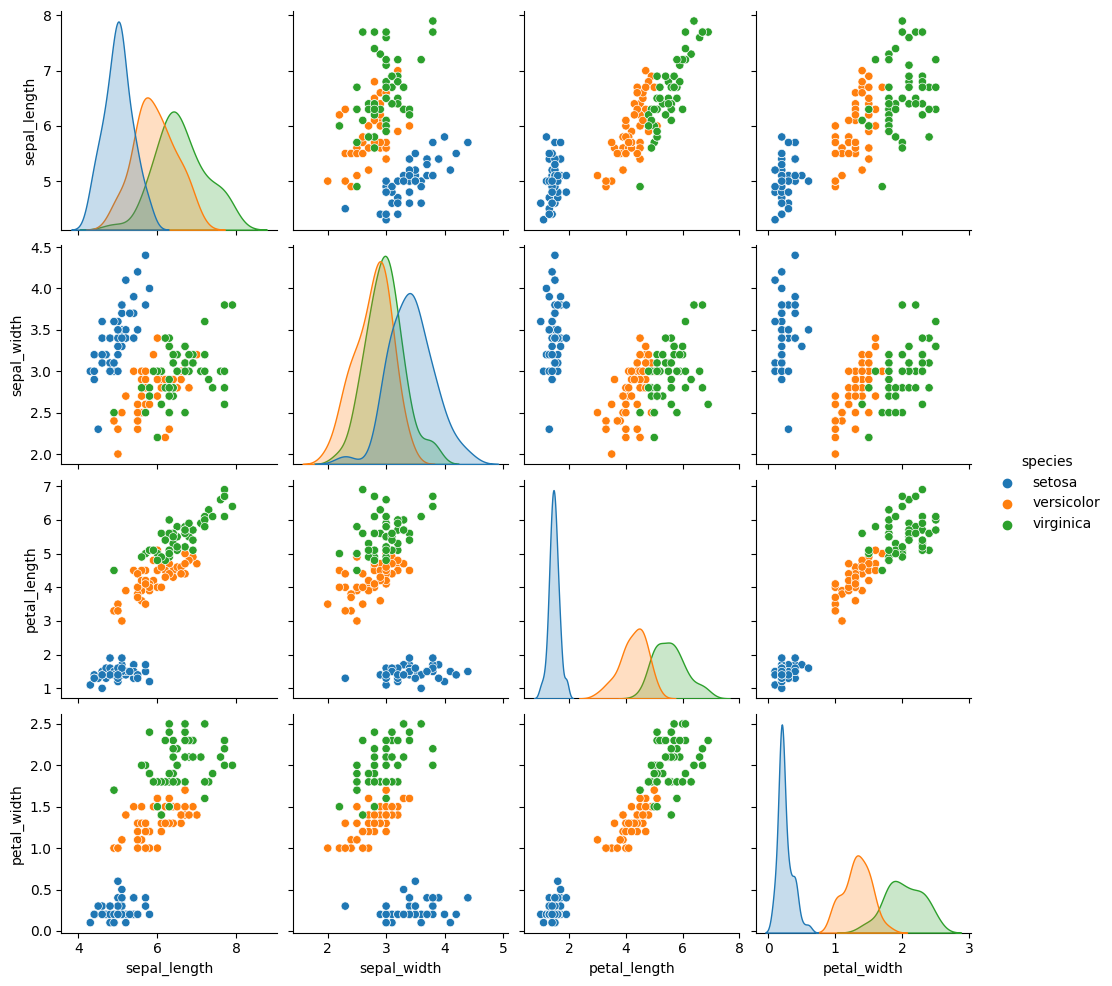

In [24]:
# import dataset(iris)
df = sns.load_dataset("iris")

print(df.head())

sns.pairplot(df, hue="species", diag_kind="kde")
# hue : column name of key
# diag_kind : kernel density estimation

## k-means法

c:\Programs\tools\clustering\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   sepal_length  sepal_width  petal_length  petal_width   cluster
0           5.1          3.5           1.4          0.2  cluster2
1           4.9          3.0           1.4          0.2  cluster2
2           4.7          3.2           1.3          0.2  cluster2
3           4.6          3.1           1.5          0.2  cluster2
4           5.0          3.6           1.4          0.2  cluster2


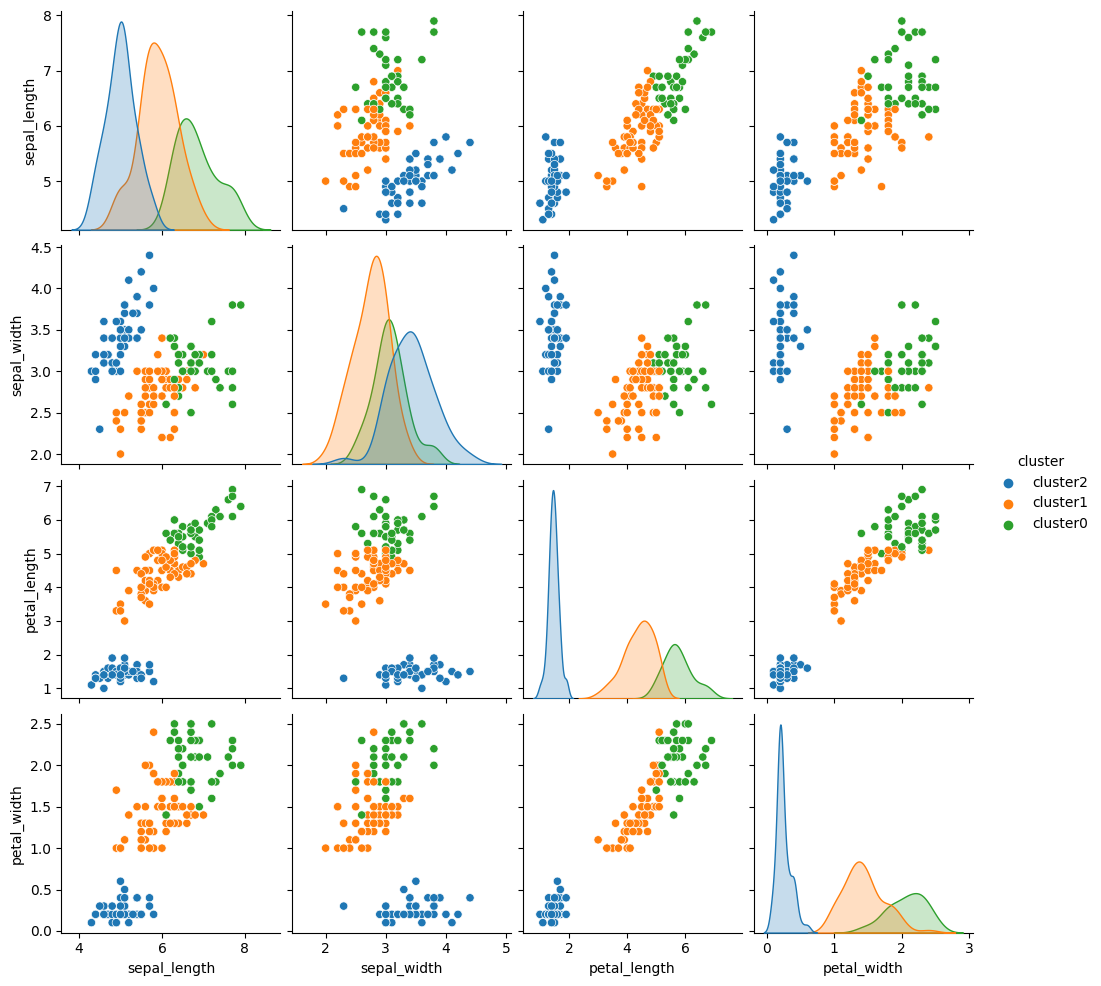

In [25]:
from sklearn.cluster import KMeans

# build model
kmeans = KMeans(n_clusters=3, max_iter=300, init="random")

# clustering
cluster = kmeans.fit_predict(df.values[:,0:4])

df_cluster = df.iloc[:, [0, 1, 2, 3]]
df_cluster["cluster"] = ["cluster"+str(x) for x in cluster]

print(df_cluster.head())

# visualization
sns.pairplot(df_cluster, hue="cluster", diag_kind="kde")

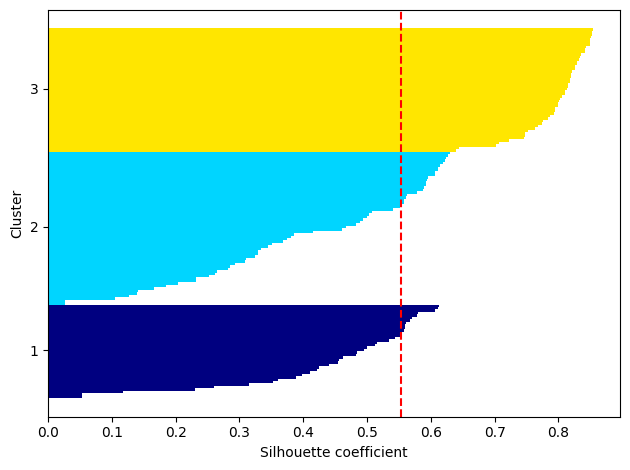

In [26]:
# evaluation
# Silhouette Coefficient

from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(cluster)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(df.values[:,0:4], cluster)
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals, height=1.0, 
             edgecolor = 'none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels+1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")

plt.tight_layout()
plt.show()

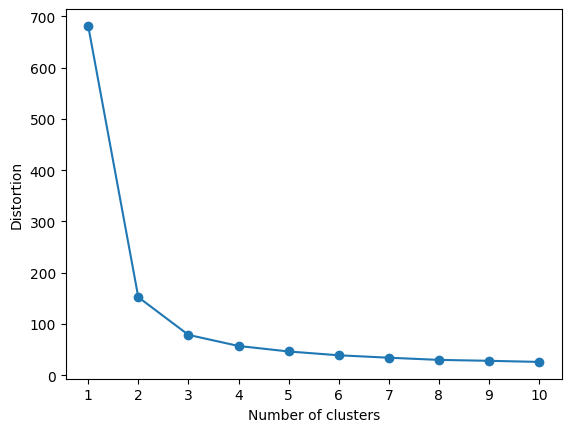

In [27]:
# optimization number of clusters
# Elbow Method
distortions = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=300, random_state=0)
    kmeans.fit(df.values[:,0:4])
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker="o")
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()